# Calcium-independent Transient Outward K+ Current (I_t) 

*Task 1 : Create matlab/python code for Calcium-independent Transient Outward K+ Current (I_t)*
- create a new cell model for I_t
- set a volatge 10 millivolts
- run it to steady state
- the value will a singular data point on the graph
- model with 4 state variables  a_endo, s, b_endo, s
- very simple to pull out and code up
- look at paper to describe the channel and it will show an equation for it

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [13]:

""" C o n s t a n t s """
# Constants from the paper itself 
g_t_epi = 0.035
g_t_endo = 0.4647*g_t_epi
a_endo = 0.583
b_endo =  0.417
a_epi = 0.886
b_epi = 0.114
K_o = 5.4  
K_i= 139.2751 
T = 295
R = 8314.5  
F = 96487 


In [14]:

""" E q u a t i o n s   f r o m   t h e   p a p e r """
# Ca_independent_transient_outward_K_current_r_gate
def dr_dt(t, r, V):
    r_infinity = 1 / (1 + np.exp((V + 10.6) / -11.42))
    tau_r = 1 / (45.16 * np.exp(0.03577 * (V + 50)) + 98.9 * np.exp(-0.1 * (V + 38)))
    return (r_infinity - r) / tau_r

# Ca_independent_transient_outward_K_current_s_gate
def ds_dt(t, s, V):
    s_infinity =  1 / (1 + np.exp((V + 45.3) / 6.8841))
    tau_s_endo = 0.55 * np.exp(-((V + 70) / 25)**2) + 0.049
    return (s_infinity - s) / tau_s_endo

# Ca_independent_transient_outward_K_current_s_slow_gate
def ds_slow_dt(t, s_slow, V):
    s_slow_infinity = 1 / (1 + np.exp((V + 45.3) / 6.8841))
    tau_s_slow_endo = 3.3 * np.exp(-((V + 70) / 30)**2) + 0.049
    return (s_slow_infinity - s_slow) / tau_s_slow_endo


### Solving differential equation function


In [15]:
""" S o l v i n g   E q u a t i o n s """
def solve_differential(V): 
    # Initial values got these from the model
    r0 = 0.002191519
    s0 = 0.9842542
    s_slow0 = 0.6421196
    t_span = (0, 5)
    t_eval = np.linspace(0, 5, 20)

    # Solving the differential equations
    r_solution = solve_ivp(dr_dt, t_span, [r0], args=(V,), t_eval=t_eval,  method='RK45')
    s_solution = solve_ivp(ds_dt, t_span, [s0], args=(V,), t_eval=t_eval,  method='RK45')
    s_slow_solution = solve_ivp(ds_slow_dt, t_span, [s_slow0], args=(V,), t_eval=t_eval,  method='RK45')

    # Extract the final steady-state values
    # ASSUMPTION : final solution is steadystate as its taking incredibly long to run the code 
    r_steady = r_solution.y[0]
    s_steady = s_solution.y[0]
    s_slow_steady = s_slow_solution.y[0]

    return r_steady,s_steady,s_slow_steady

### Validating the outputs of the steady state value 
- manually calculation of steady state values 
- when looking for steady state e.g ds/dt = 0
- that means s = s infinity 


In [16]:
# Testing values 
V_test = 0
t_manual = np.linspace(0,100,2)
t_eval =  np.linspace(0,5,20)
print(t_manual)

[  0. 100.]


In [17]:
# Terrible way to check this but just wanted to quickly creat a dotted line for the manual calculation
r_steady_manual = [1 / (1 + np.exp((V_test + 10.6) / -11.42)),1 / (1 + np.exp((V_test + 10.6) / -11.42))]
s_steady_manual = [ 1 / (1 + np.exp((V_test + 45.3) / 6.8841)),1 / (1 + np.exp((V_test + 45.3) / 6.8841))]
s_slow_steady_manual = [1 / (1 + np.exp((V_test + 45.3) / 6.8841)),1 / (1 + np.exp((V_test + 45.3) / 6.8841))]
print(r_steady_manual)
print(s_steady_manual)
print(s_slow_steady_manual)

[0.7167091795909128, 0.7167091795909128]
[0.0013853988021100161, 0.0013853988021100161]
[0.0013853988021100161, 0.0013853988021100161]


In [18]:
# Using solver to calculated the steady state values
r_solution,s_solution,s_slow_solution= solve_differential(V_test)

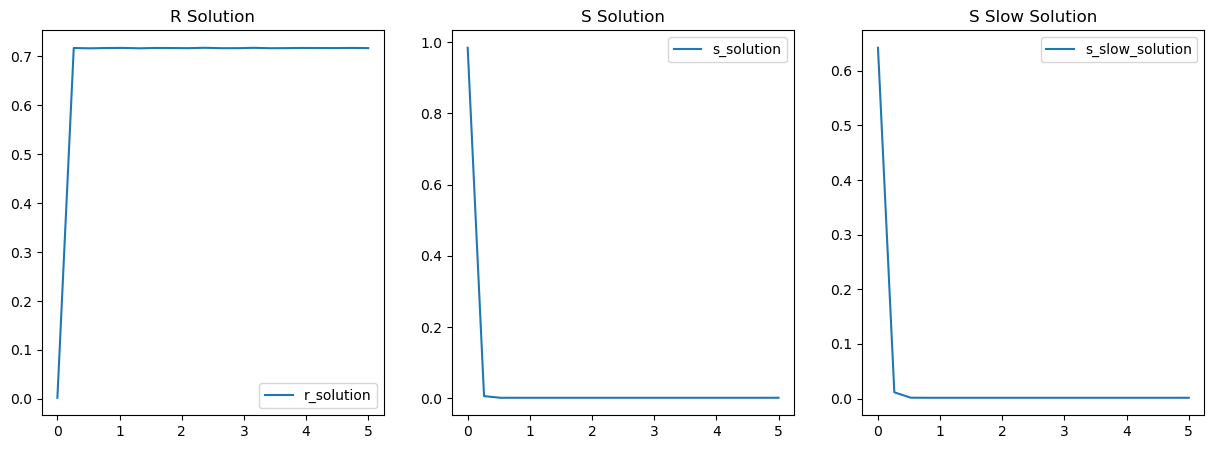

In [19]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot R Solution
axs[0].plot(t_eval, r_solution, label='r_solution')
#axs[0].plot(t_manual, r_steady_manual, label='r_steady_manual', linestyle='--')
axs[0].set_title('R Solution')
axs[0].legend()

# Plot S Solution
axs[1].plot(t_eval, s_solution, label='s_solution')
#axs[1].plot(t_manual, s_steady_manual, label='s_steady_manual', linestyle='--')
axs[1].set_title('S Solution')
axs[1].legend()

# Plot S Slow Solution
axs[2].plot(t_eval, s_slow_solution, label='s_slow_solution')
#axs[2].plot(t_manual, s_slow_steady_manual, label='s_slow_steady_manual', linestyle='--')
axs[2].set_title('S Slow Solution')
axs[2].legend()


In [20]:
# for voltage = V
V=0
# Calculating E_K using the Nernst equation
E_K = R*T/F*np.log(K_o/K_i)*1e3

# Compute I_t for both endocardial and epicardial cells over the range of voltages
a = a_endo
b = b_endo
g_t = g_t_endo
i_t_test = g_t * r_steady_manual[0] * (a * s_steady_manual[0] + b* s_slow_steady_manual[0]) * (V - E_K)
print(i_t_test)


1.3342529534973262


In [21]:
# Terrible way to check this but just wanted to quickly creat a dotted line for the manual calculation
r_steady_manual = [1 / (1 + np.exp((V_test + 10.6) / -11.42)),1 / (1 + np.exp((V_test + 10.6) / -11.42))]
s_steady_manual = [ 1 / (1 + np.exp((V_test + 45.3) / 6.8841)),1 / (1 + np.exp((V_test + 45.3) / 6.8841))]
s_slow_steady_manual = [1 / (1 + np.exp((V_test + 45.3) / 6.8841)),1 / (1 + np.exp((V_test + 45.3) / 6.8841))]
print(r_steady_manual)
print(s_steady_manual)
print(s_slow_steady_manual)

[0.7167091795909128, 0.7167091795909128]
[0.0013853988021100161, 0.0013853988021100161]
[0.0013853988021100161, 0.0013853988021100161]


### Computing the current of endocardial and epicardial

In [22]:
""" C a l c u l a t i n g  C u r r e n t """
# Function to compute I_t for given cell type
def compute_current(cell_type, V):
    if cell_type == 'endo':
        a = a_endo
        b = b_endo
        g_t = g_t_endo
    elif cell_type == 'epi':
        a = a_epi
        b = b_epi
        g_t = g_t_epi

    # Solving differential equations 
    r_sol,s_sol,s_slow_sol= solve_differential(V)
    r_steady = r_sol[-1]
    s_steady = s_sol[-1]
    s_slow_steady = s_slow_sol[-1]
    
    # Calculating E_K using the Nernst equation
    E_K = R*T/F*np.log(K_o/K_i) #*1e3

    # Compute I_t for both endocardial and epicardial cells over the range of voltages
    i_t = g_t * r_steady * (a * s_steady + b* s_slow_steady) #* (V - E_K)
    return i_t

In [23]:
# Membrane potential array from -60 mV to 60 mV
V = np.linspace(-60, 60, 40)
i_t_endo = np.zeros(len(V))
i_t_epi = np.zeros(len(V))
for i, v in enumerate(V):
    i_t_endo[i] = compute_current('endo', v)
    i_t_epi[i] = compute_current('epi', v)
print(i_t_epi)
print(i_t_endo)

[4.05892825e-04 5.00278444e-04 6.00183313e-04 6.94196845e-04
 7.67901072e-04 8.06526251e-04 8.03230932e-04 7.60126146e-04
 6.87543376e-04 5.98924041e-04 5.06047474e-04 4.16470033e-04
 3.35001677e-04 2.63969315e-04 2.03678379e-04 1.54199801e-04
 1.14419033e-04 8.32701762e-05 5.94822375e-05 4.17415082e-05
 2.88309205e-05 1.96417153e-05 1.32307441e-05 8.82487546e-06
 5.82437450e-06 3.81881743e-06 2.49214444e-06 1.62021591e-06
 1.05083516e-06 6.80055620e-07 4.39751728e-07 2.84503166e-07
 1.84502167e-07 1.20231727e-07 7.89136027e-08 5.23888993e-08
 3.53795052e-08 2.44905753e-08 1.75168074e-08 1.30474029e-08]
[1.85542309e-04 2.29666261e-04 2.76872519e-04 3.21859795e-04
 3.57601682e-04 3.76751912e-04 3.75592989e-04 3.55049976e-04
 3.20481349e-04 2.78656551e-04 2.35204594e-04 1.93527977e-04
 1.55671702e-04 1.22669419e-04 9.46624850e-05 7.16564871e-05
 5.31714785e-05 3.87021743e-05 2.76388522e-05 1.94011449e-05
 1.33982759e-05 9.12773287e-06 6.14798190e-06 4.09752219e-06
 2.70652237e-06 1.77412

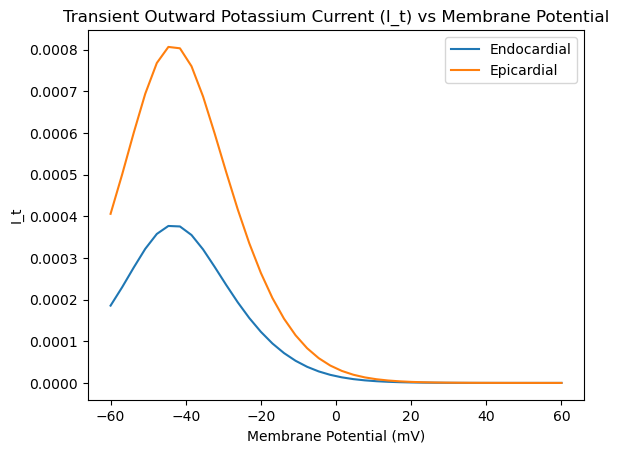

In [24]:
""" P l o t t i n g   R e s u l t s """
# Plotting the results
plt.figure()
plt.plot(V, i_t_endo, label='Endocardial')  # ENDOCARDIAL ISN"T WORKING
plt.plot(V, i_t_epi, label='Epicardial')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('I_t')
plt.title('Transient Outward Potassium Current (I_t) vs Membrane Potential')
plt.legend()
plt.show()


# 2.0 Checking State Variable and Time Constant Graphs

![image.png](attachment:image.png)

## 2.1 Time Constants 

In [26]:
V = np.linspace(-100, 60, 40)

tau_r_values = 1.0 / (45.16 * np.exp(0.03577 * (V + 50.0)) + 98.9 * np.exp(-0.1 * (V + 38.0)))
tau_s_values =   0.35 * np.exp(-((V + 70.0) / 15.0)**2) + 0.035
tau_slow_values = 3.7 * np.exp(-((V + 70.0) / 30.0)**2) + 0.035

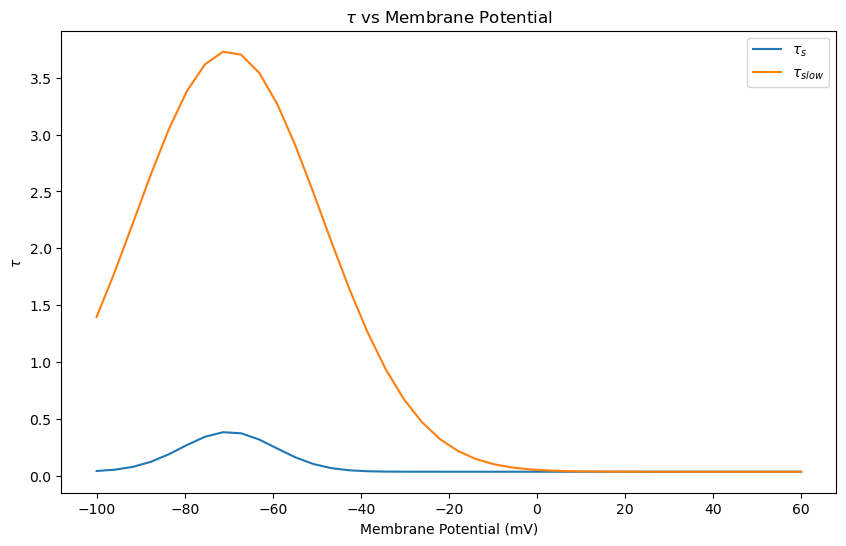

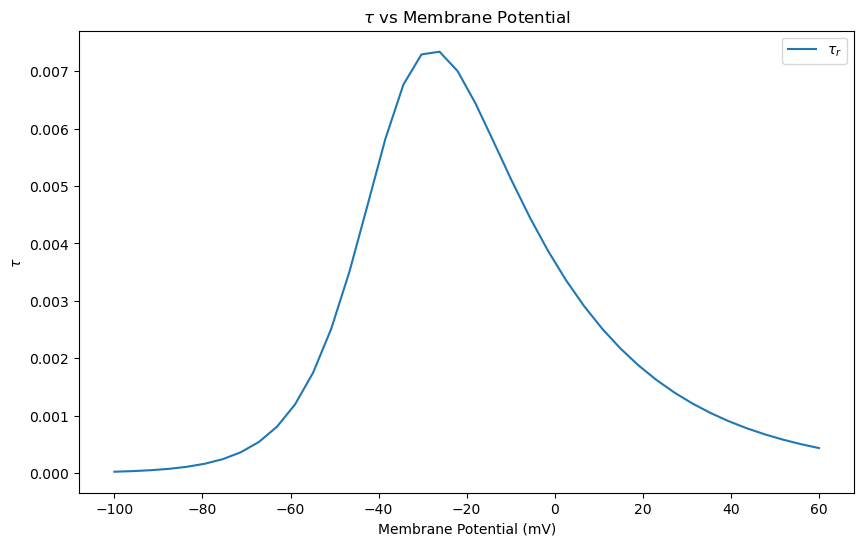

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(V, tau_s_values, label=r'$\tau_s$')
plt.plot(V, tau_slow_values, label=r'$\tau_{slow}$')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel(r'$\tau$')
plt.title(r'$\tau$ vs Membrane Potential')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(V, tau_r_values, label=r'$\tau_r$')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel(r'$\tau$')
plt.title(r'$\tau$ vs Membrane Potential')
plt.legend()
plt.show()

## 2.2 State Variables 

In [28]:
# Function to compute I_t for given cell type
def compute_current(cell_type, V):
    if cell_type == 'endo':
        a = a_endo
        b = b_endo
        g_t = g_t_endo
    elif cell_type == 'epi':
        a = a_epi
        b = b_epi
        g_t = g_t_epi

    # Solving differential equations 
    r_sol,s_sol,s_slow_sol= solve_differential(V)
    
    r_steady = r_sol[-1]
    s_steady = s_sol[-1]
    s_slow_steady = s_slow_sol[-1]
    
    # Calculating E_K using the Nernst equation
    E_K = R*T/F*np.log(K_o/K_i) #*1e3

    # Compute I_t for both endocardial and epicardial cells over the range of voltages
    i_t = g_t * r_steady * (a * s_steady + b* s_slow_steady) #* (V - E_K)
    return i_t,r_steady,s_steady,s_slow_steady

In [29]:
# Membrane potential array from -60 mV to 60 mV
V = np.linspace(-60, 60, 40)
i_t_endo = np.zeros(len(V))
i_t_epi = np.zeros(len(V))
r_steady_epi = np.zeros(len(V))
r_steady_endo = np.zeros(len(V))
s_steady_epi = np.zeros(len(V))
s_steady_endo = np.zeros(len(V))
s_slow_steady_epi = np.zeros(len(V))
s_slow_steady_endo = np.zeros(len(V))
for i, v in enumerate(V):
    i_t_endo[i],r_steady_endo[i],s_steady_endo[i],s_slow_steady_endo[i] = compute_current('endo', v)
    i_t_epi[i],r_steady_epi[i],s_steady_epi[i],s_slow_steady_epi[i] = compute_current('epi', v)
print(i_t_epi)
print(i_t_endo)

[4.05892825e-04 5.00278444e-04 6.00183313e-04 6.94196845e-04
 7.67901072e-04 8.06526251e-04 8.03230932e-04 7.60126146e-04
 6.87543376e-04 5.98924041e-04 5.06047474e-04 4.16470033e-04
 3.35001677e-04 2.63969315e-04 2.03678379e-04 1.54199801e-04
 1.14419033e-04 8.32701762e-05 5.94822375e-05 4.17415082e-05
 2.88309205e-05 1.96417153e-05 1.32307441e-05 8.82487546e-06
 5.82437450e-06 3.81881743e-06 2.49214444e-06 1.62021591e-06
 1.05083516e-06 6.80055620e-07 4.39751728e-07 2.84503166e-07
 1.84502167e-07 1.20231727e-07 7.89136027e-08 5.23888993e-08
 3.53795052e-08 2.44905753e-08 1.75168074e-08 1.30474029e-08]
[1.85542309e-04 2.29666261e-04 2.76872519e-04 3.21859795e-04
 3.57601682e-04 3.76751912e-04 3.75592989e-04 3.55049976e-04
 3.20481349e-04 2.78656551e-04 2.35204594e-04 1.93527977e-04
 1.55671702e-04 1.22669419e-04 9.46624850e-05 7.16564871e-05
 5.31714785e-05 3.87021743e-05 2.76388522e-05 1.94011449e-05
 1.33982759e-05 9.12773287e-06 6.14798190e-06 4.09752219e-06
 2.70652237e-06 1.77412

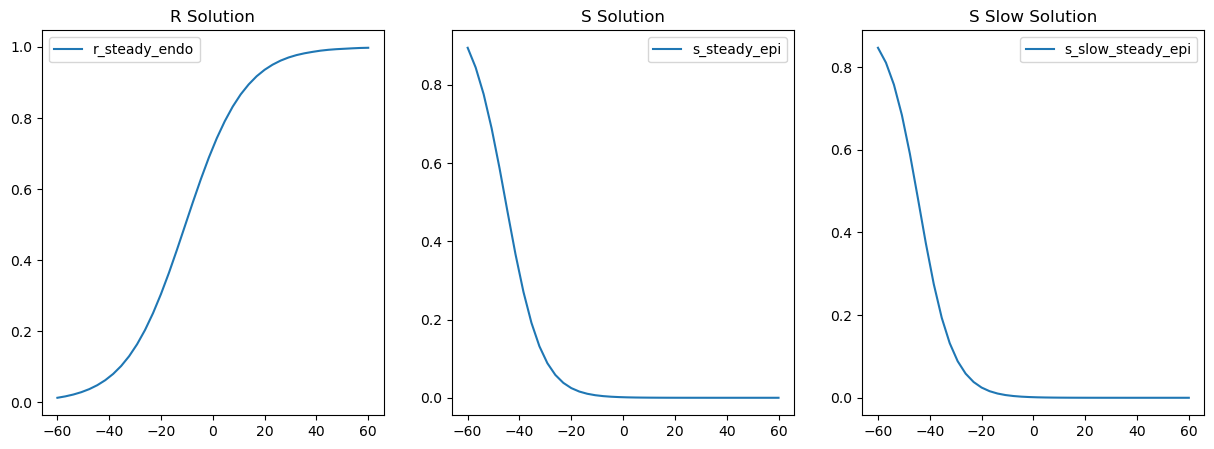

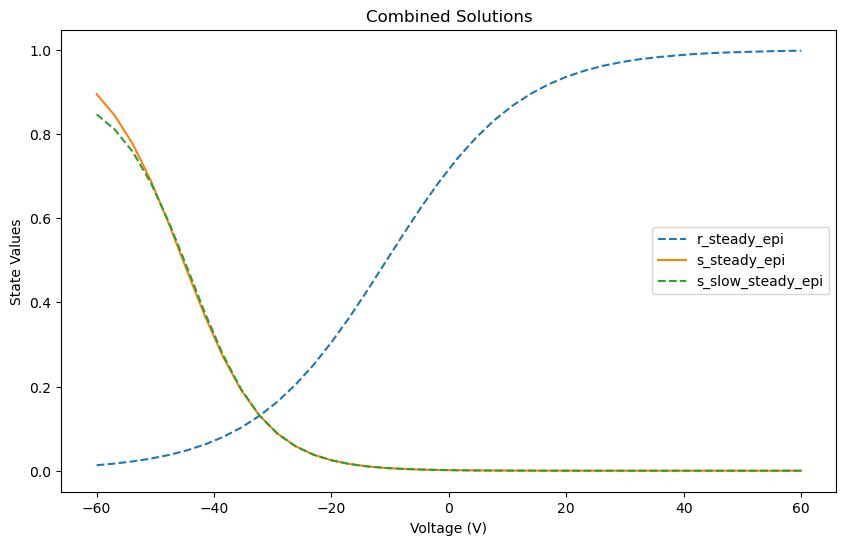

In [31]:
""" P l o t t i n g   R e s u l t s """
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot R against voltage
axs[0].plot(V, r_steady_endo, label='r_steady_endo')
# axs[0].plot(V, r_steady_epi, label='r_steady_epi', linestyle='--')
axs[0].set_title('R Solution')
axs[0].legend()

# Plot S against voltage
axs[1].plot(V, s_steady_epi, label='s_steady_epi')
# axs[1].plot(V, s_steady_endo, label='s_steady_endo', linestyle='--')
axs[1].set_title('S Solution')
axs[1].legend()

# Plot S slow against voltage
axs[2].plot(V, s_slow_steady_epi, label='s_slow_steady_epi')
# axs[2].plot(V, s_slow_steady_endo, label='s_slow_steady_endo', linestyle='--')
axs[2].set_title('S Slow Solution')
axs[2].legend()

# Plotting combined plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot state solutions against voltage
ax.plot(V, r_steady_epi, label='r_steady_epi', linestyle='--')
ax.plot(V, s_steady_epi, label='s_steady_epi')
ax.plot(V, s_slow_steady_epi, label='s_slow_steady_epi', linestyle='--')

# labelling
ax.legend()
ax.set_title('Combined Solutions')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('State Values')
plt.show()



# 3.0 Calculating Peak Current 

**Task 2 : Use peak current values instead of the steady state**
- start at 70
- then jump at set voltage
- solve for the current
- pull out the peak value
- -70 runs to steady state
- use those values as initial conditions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g_t_epi = 0.035
g_t_endo = 0.4647 * g_t_epi
a_endo = 0.583
b_endo = 0.417
a_epi = 0.886
b_epi = 0.114
K_o = 5.4
K_i = 139.2751
T = 295
R = 8314.5
F = 96487

In [ ]:
V = np.linspace(-60, 60, 20)


def dr_dt(t, r, V):
    r_infinity = 1 / (1 + np.exp((V + 10.6) / -11.42))
    tau_r = 1 / (45.16 * np.exp(0.03577 * (V + 50)) + 98.9 * np.exp(-0.1 * (V + 38)))
    return (r_infinity - r) / tau_r

def ds_dt(t, s, V):
    s_infinity = 1 / (1 + np.exp((V + 45.3) / 6.8841))
    tau_s_endo = 0.55 * np.exp(-((V + 70) / 25)**2) + 0.049
    return (s_infinity - s) / tau_s_endo

def ds_slow_dt(t, s_slow, V):
    s_slow_infinity = 1 / (1 + np.exp((V + 45.3) / 6.8841))
    tau_s_slow_endo = 3.3 * np.exp(-((V + 70) / 30)**2) + 0.049
    return (s_slow_infinity - s_slow) / tau_s_slow_endo

In [ ]:

def compute_current(cell_type, V):
    if cell_type == 'endo':
        a = a_endo
        b = b_endo
        g_t = g_t_endo
    elif cell_type == 'epi':
        a = a_epi
        b = b_epi
        g_t = g_t_epi
    
    # Initial values
    r0 = 0.002191519
    s0 = 0.9842542
    s_slow0 = 0.6421196

    end_time = 20
    t_span = (0, end_time)  
    t_eval = np.linspace(0, end_time, 1000) 

    # Solving
    r_solution = solve_ivp(dr_dt, t_span, [r0], args=(V,), t_eval=t_eval, method='RK45')
    s_solution = solve_ivp(ds_dt, t_span, [s0], args=(V,), t_eval=t_eval, method='RK45')
    s_slow_solution = solve_ivp(ds_slow_dt, t_span, [s_slow0], args=(V,), t_eval=t_eval, method='RK45')

    # Extract the values at each time step
    r_values = r_solution.y[0]
    s_values = s_solution.y[0]
    s_slow_values = s_slow_solution.y[0]

    # Calculating E_K using the Nernst equation
    E_K = (R * T / F) * np.log(K_o / K_i)

    # Compute I_t at each time step and find the maximum value
    i_t_values = g_t * r_values * (a * s_values + b * s_slow_values) * (V - E_K)
    i_t_peak = np.max(i_t_values)
    return i_t_peak


In [ ]:
# Compute I_t for both endocardial and epicardial cells over the range of voltages
i_t_peak_endo = np.array([compute_current('endo', v) for v in V])
i_t_peak_epi = np.array([compute_current('epi', v) for v in V])

In [ ]:
# Ensure that the data types are correct and plot the results
plt.figure()
plt.plot(V, i_t_peak_endo, label='Endocardial')
plt.plot(V, i_t_peak_epi, label='Epicardial')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Peak I_t (pA/pF)')
plt.title('Peak Transient Outward Potassium Current (I_t) vs Membrane Potential')
plt.legend()
plt.show()